In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
#importing dataset
data=pd.read_csv(r"C:\Users\HP\Dropbox\My PC (DESKTOP-A6DAH59)\Downloads\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
X=data.drop("Species",axis=1)
y=data['Species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=3)

In [22]:
y_train.value_counts()/len(y_train)

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

In [23]:
y_test.value_counts()/len(y_test)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
ypred=dtc.predict(X_test)

In [25]:
df=pd.DataFrame({'Actual':y_test,'Predicted':ypred})

In [26]:
df.head()

,Actual,Predicted
47,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
31,Iris-setosa,Iris-setosa
25,Iris-setosa,Iris-setosa
15,Iris-setosa,Iris-setosa


In [27]:
#to calculate the accuracy
from sklearn import metrics
print("The accuracy of the model is {}".format(metrics.accuracy_score(y_test, ypred)))

The accuracy of the model is 1.0


In [28]:
from sklearn.metrics import classification_report
print("classification report:",classification_report(y_test,ypred))

classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



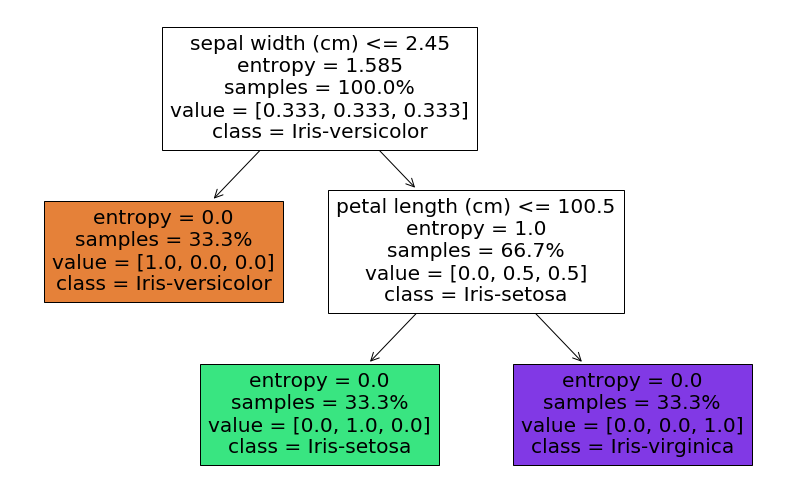

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(14,9))
species=['Iris-versicolor', 'Iris-setosa','Iris-virginica']
fn=['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']
img=tree.plot_tree(dtc,feature_names =fn, class_names=species,filled = True,precision=3,proportion=True)
plt.show()